In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_analytics_lib as dal
import random


# Exercise 1

## Python function to read in the data from the file Baseball_Team_Salaries.csv and put the data into the data structures

In [61]:
def read_baseball_data(file_path):

    year = []
    team = []
    wins = []
    losses = []
    win_percentage = []
    salary = []
    
    with open(file_path, 'r') as file:
        data = file.readlines()
    
        for line in data[1:]:  # Skip header line
            lines = line.split(',')
            year.append(int(lines[0]))
            team.append(lines[1])
            wins.append(int(lines[2]))
            losses.append(int(lines[3]))
            win_percentage.append(float(lines[4]))
            salary.append(float(lines[5]))
        
    return year, team, wins, losses, win_percentage, salary



years_list, teams_list, wins_list, losses_list, wp_list, salary_list = read_baseball_data('/Users/244213/Desktop/DataAnalytics/Stats/Baseball_Team_Salaries.csv')



def organize_data_by_year_and_team(years_list, teams_list, wins_list, losses_list, wp_list, salary_list):
    
    yearly_data = {}
    team_data = {}
    
    unique_years = np.unique(years_list)
    
    for year in unique_years:
        
        temp_teams_list = []
        temp_wins_list = []
        temp_losses_list = []
        temp_wp_list = []
        temp_salary_list = []
        
        for i in range(len(years_list)):
            if years_list[i] == year:
                temp_teams_list.append(teams_list[i])
                temp_wins_list.append(wins_list[i])
                temp_losses_list.append(losses_list[i])
                temp_wp_list.append(wp_list[i])
                temp_salary_list.append(salary_list[i])
                
        yearly_data[year] = {
            'teams': temp_teams_list,
            'wins': temp_wins_list,
            'losses': temp_losses_list,
            'win_percentage': temp_wp_list,
            'salary': temp_salary_list
        }
        
    unique_teams = np.unique(teams_list)

    for team in unique_teams:
        
        temp_years_list = []
        temp_wins_list = []
        temp_losses_list = []
        temp_wp_list = []
        temp_salary_list = []
        
        for i in range(len(teams_list)):
            if teams_list[i] == team:
                temp_years_list.append(years_list[i])
                temp_wins_list.append(wins_list[i])
                temp_losses_list.append(losses_list[i])
                temp_wp_list.append(wp_list[i])
                temp_salary_list.append(salary_list[i])
                
        team_data[team] = {
            'years': temp_years_list,
            'wins': temp_wins_list,
            'losses': temp_losses_list,
            'win_percentage': temp_wp_list,
            'salary': temp_salary_list
        }
        
    return yearly_data, team_data
    
yearly_data_structure, team_data_structure = organize_data_by_year_and_team(years_list, teams_list, wins_list, losses_list, wp_list, salary_list)

print(yearly_data_structure)
print(team_data_structure)
        

{np.int64(1986): {'teams': ['New York Mets', 'Philadelphia Phillies', 'St. Louis Cardinals', 'Montreal Expos', 'Chicago Cubs', 'Pittsburgh Pirates', 'Houston Astros', 'Cincinnati Reds', 'San Francisco Giants', 'San Diego Padres', 'Los Angeles Dodgers', 'Atlanta Braves'], 'wins': [108, 86, 79, 78, 70, 64, 96, 86, 83, 74, 73, 72], 'losses': [54, 75, 82, 83, 90, 98, 66, 76, 79, 88, 89, 89], 'win_percentage': [0.667, 0.534, 0.491, 0.484, 0.438, 0.395, 0.593, 0.531, 0.512, 0.457, 0.451, 0.447], 'salary': [13597780.0, 11715166.0, 9481677.0, 11937394.0, 16904832.0, 10231500.0, 10368276.0, 11785036.0, 8682000.0, 11897522.0, 15471276.0, 17940286.0]}, np.int64(1987): {'teams': ['St. Louis Cardinals', 'New York Mets', 'Montreal Expos', 'Pittsburgh Pirates', 'Philadelphia Phillies', 'Chicago Cubs', 'San Francisco Giants', 'Cincinnati Reds', 'Houston Astros', 'Los Angeles Dodgers', 'Atlanta Braves', 'San Diego Padres'], 'wins': [95, 92, 91, 80, 80, 76, 90, 84, 76, 73, 69, 65], 'losses': [67, 70, 71

# Exercise 2

## 1. Use your existing statistics function to compute mean , median ,standard deviation, min and max for the all the team salaries for year each.

In [62]:
# Salary Statistics Over Years
salary_means = []
salary_medians = []
salary_stds = []
salary_mins = []
salary_maxs = []

for i in range(len(yearly_data_structure)):
    
    year = list(yearly_data_structure.keys())[i]
    salaries = yearly_data_structure[year]['salary']
    
    mean_salary = dal.main_stats(salaries)['mean']
    median_salary = dal.main_stats(salaries)['median']
    std_salary = dal.main_stats(salaries)['std_dev']
    min_salary = dal.main_stats(salaries)['min']
    max_salary = dal.main_stats(salaries)['max']
    
    salary_means.append(mean_salary)
    salary_medians.append(median_salary)
    salary_stds.append(std_salary)
    salary_mins.append(min_salary)
    salary_maxs.append(max_salary)


## 2. Write a function to produce a plots of each of these statistics, all on one plot, as a function of year.

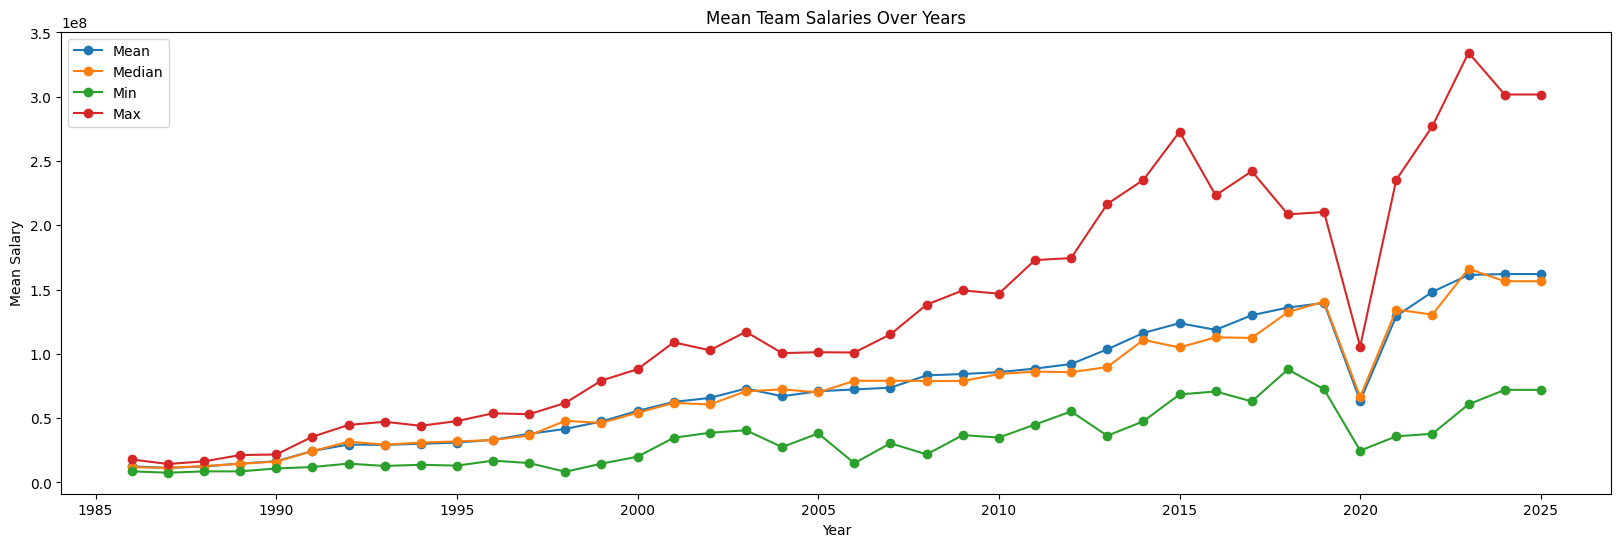

In [63]:
plt.figure(figsize=(20, 6))

plt.plot(list(yearly_data_structure.keys()), salary_means, marker='o', label='Mean')
plt.plot(list(yearly_data_structure.keys()), salary_medians, marker='o', label='Median')
plt.plot(list(yearly_data_structure.keys()), salary_mins, marker='o', label='Min')
plt.plot(list(yearly_data_structure.keys()), salary_maxs, marker='o', label='Max')

plt.legend()
plt.title('Mean Team Salaries Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Salary')
plt.show()

## 3. Use your generic XY plot function, to plot the standard deviation of the team salaries for each year.

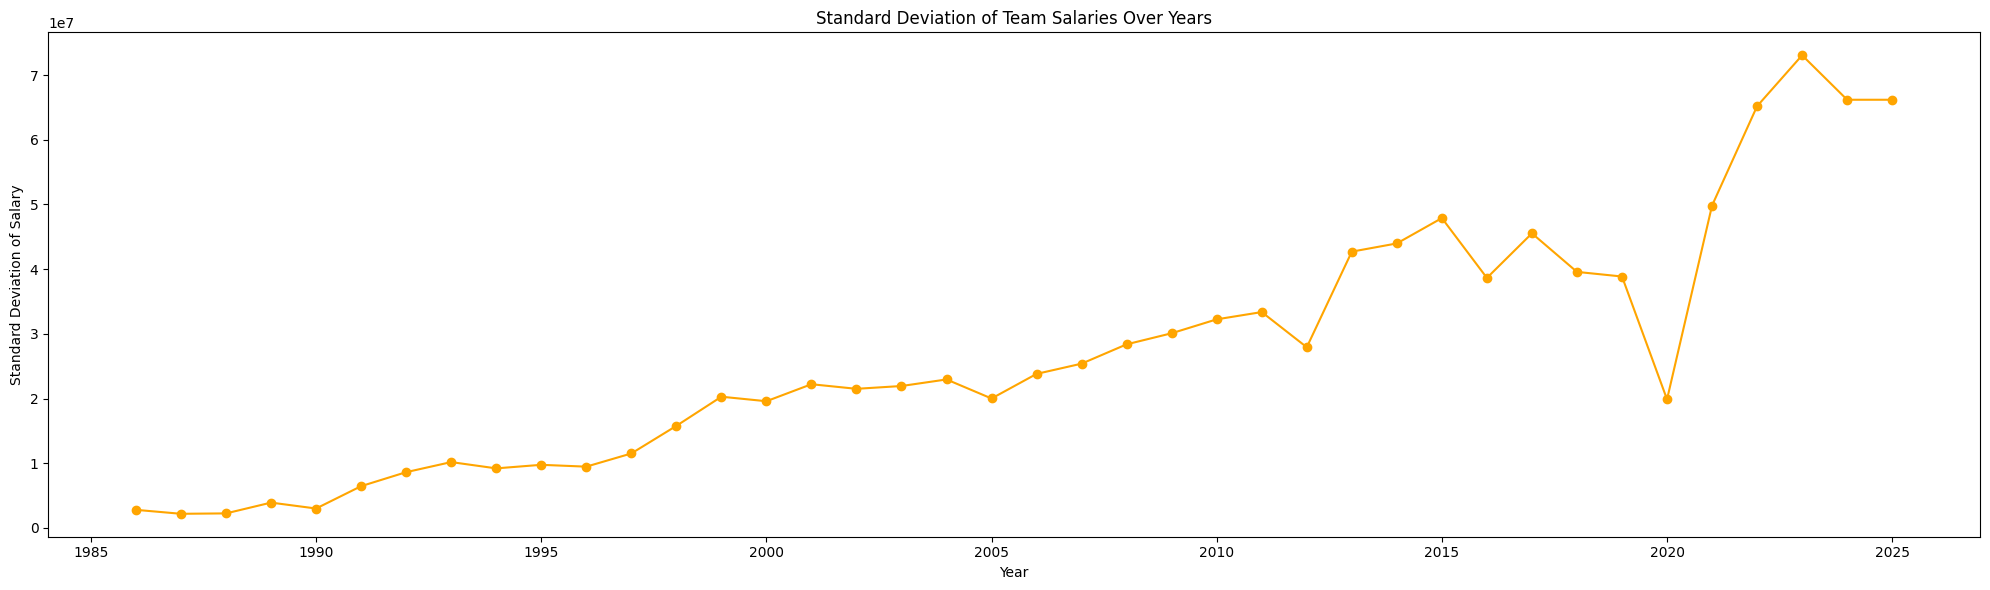

In [64]:
plt.figure(figsize=(20, 6))

dal.xy_plot(list(yearly_data_structure.keys()), salary_stds, 'Year', 'Standard Deviation of Salary', 'Standard Deviation of Team Salaries Over Years', marker='o', color='orange')

## 4. For each year, compute the ratio of the salary standard deviation to the salary mean. Plot this ratio as a function of years.

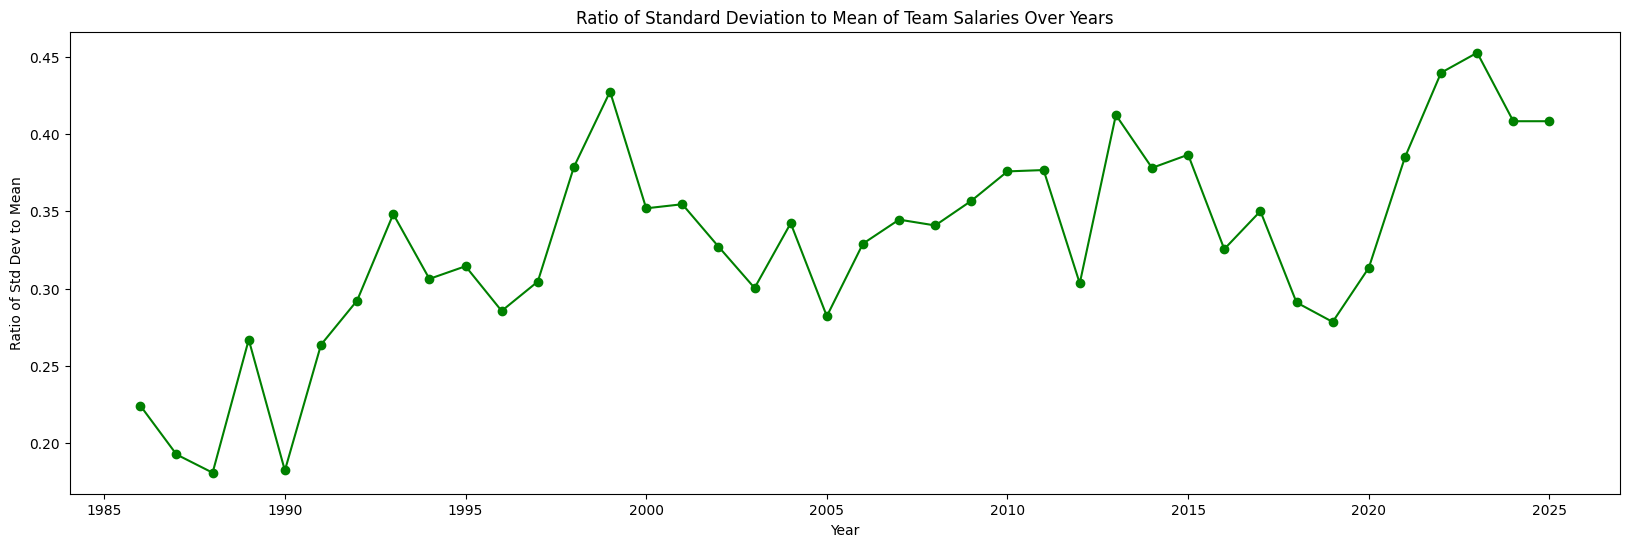

In [65]:
ratio_std_mean = np.array(salary_stds)/np.array(salary_means)

plt.figure(figsize=(20, 6))
plt.plot(list(yearly_data_structure.keys()), ratio_std_mean, marker='o', color='green')
plt.title('Ratio of Standard Deviation to Mean of Team Salaries Over Years')
plt.xlabel('Year')
plt.ylabel('Ratio of Std Dev to Mean')
plt.show()

# Exercise 3

## Write a python function to compute the correlation coefficient, of winning percentage and salary, for all teams for each year, 1986 – 2025. From these results produce a plot of the data showing the correlation coefficient versus time.

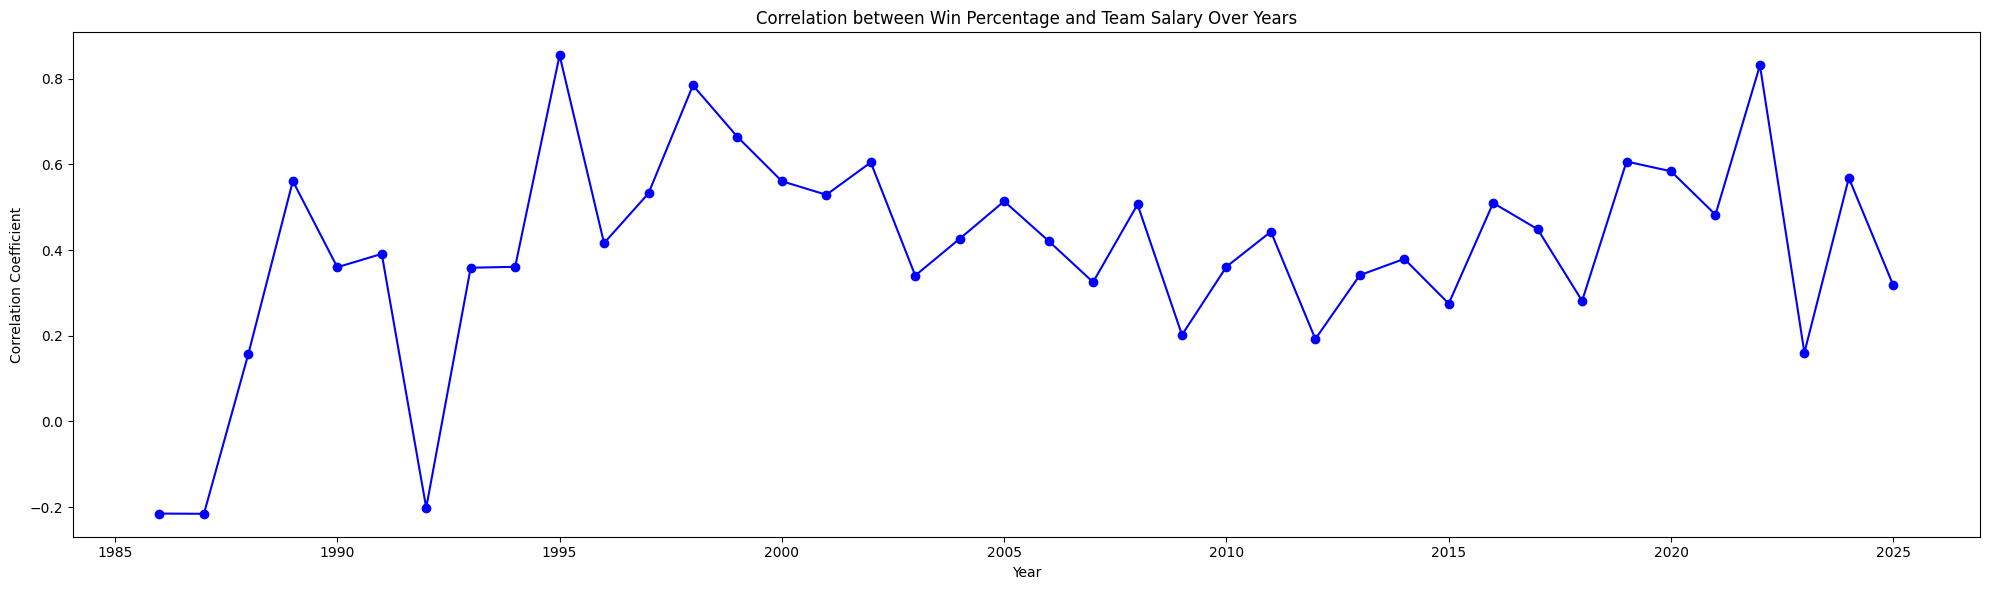

In [66]:
def corelation_wp_salary(yearly_data_structure):
    correlation_results = {}
    
    for year in yearly_data_structure:
        win_percentages = yearly_data_structure[year]['win_percentage']
        salaries = yearly_data_structure[year]['salary']
        
        correlation = dal.find_data_correlation(win_percentages, salaries)
        correlation_results[year] = correlation
        
    return correlation_results

corelation_coef_wp_salary = corelation_wp_salary(yearly_data_structure)

plt.figure(figsize=(20, 6))
dal.xy_plot(list(corelation_coef_wp_salary.keys()), list(corelation_coef_wp_salary.values()), 'Year', 'Correlation Coefficient', 'Correlation between Win Percentage and Team Salary Over Years', marker = 'o', color = 'blue')

    

# Exercise 4

## Python function to compute the correlation coefficient, between winning percentage and salary, for the top 5 teams by winning percentage, 1986 – 2025.

In [67]:
def top_5_teams_correlation_coef(yearly_data_structure):
    
    top_5_correlation = {}
    top_5_team_stats = {}
    
    bot_5_teams_correlation = {}
    bot_5_team_stats = {}
    
    team_wp_tuples = []
    
    for year in yearly_data_structure:
        
        teams = yearly_data_structure[year]['teams']
        win_percentages = yearly_data_structure[year]['win_percentage']
        salaries = yearly_data_structure[year]['salary']
        
        for i in range(len(teams)):
            team_wp_tuples.append((teams[i], win_percentages[i], salaries[i]))
        
        # Sort by win percentage and get top 5 teams
        top_5_teams = sorted(team_wp_tuples, key=lambda x: x[1], reverse=True)[:5]
        bot_5_teams = sorted(team_wp_tuples, key=lambda x: x[1])[:5]
         
        win_percentages_top5 = [team[1] for team in top_5_teams]
        salaries_top5 = [team[2] for team in top_5_teams]
        
        correlation_top5 = dal.find_data_correlation(win_percentages_top5, salaries_top5)
        top_5_correlation[year] = correlation_top5
        top_5_team_stats[year] = top_5_teams
        
        win_percentages_bot5 = [team[1] for team in bot_5_teams]
        salaries_bot5 = [team[2] for team in bot_5_teams]
        
        correlation_bot5 = dal.find_data_correlation(win_percentages_bot5, salaries_bot5)
        bot_5_teams_correlation[year] = correlation_bot5
        bot_5_team_stats[year] = bot_5_teams
        # print(bot_5_team_stats)
        
        # Reset for the next loop/year
        team_wp_tuples.clear()  
    
    return top_5_correlation, top_5_team_stats, bot_5_teams_correlation, bot_5_team_stats



corelation_of_top5_teams, top_stats, corelation_of_bot5_teams, bot_stats = top_5_teams_correlation_coef(yearly_data_structure)

# plt.figure(figsize=(20, 6))
# dal.xy_plot(list(corelation_of_top5_teams.keys()), list(corelation_of_top5_teams.values()), 'Year', 'Correlation Coefficient', 'Correlation between Win Percentage and Team Salary for Top 5 Teams Over Years', marker = 'o', color = 'red')


## 1. Produce a plot for the correlation coefficient for all teams for years 1986 – 2025, that colors all points with a negative cc red and those with a positive cc green. Connect all the points with a line. Draw a horizontal lines on the plot showing the mean of the percentages, and the mean +/- one standard deviation.

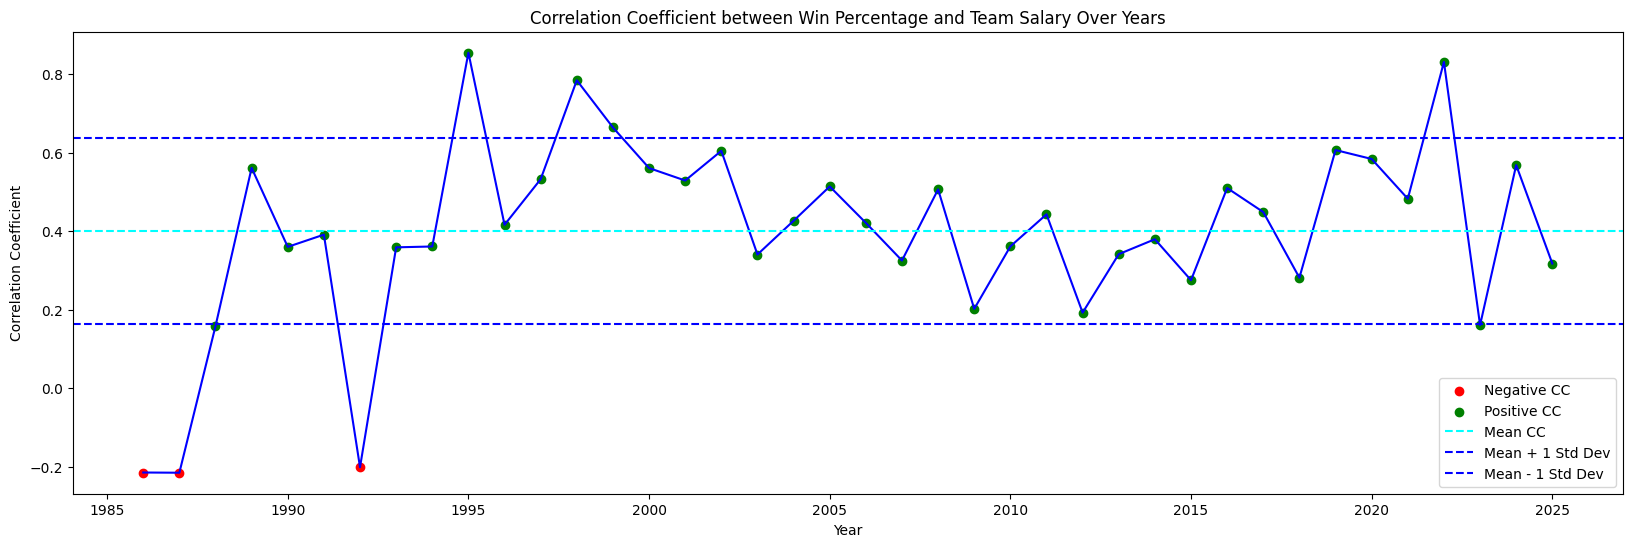

In [68]:
def neg_cc_vs_pos_cc(corelation_data):
    neg_cc = []
    pos_cc = []
    neg_cc_years = []
    pos_cc_years = []
    
    for i in corelation_data:
        if corelation_data[i] < 0:
            neg_cc.append(corelation_data[i])
            neg_cc_years.append(i)
        else:
            pos_cc.append(corelation_data[i])
            pos_cc_years.append(i)
            
    return neg_cc_years, neg_cc, pos_cc_years, pos_cc

neg_cc_years, neg_cc_pts, pos_cc_years, pos_cc_pts = neg_cc_vs_pos_cc(corelation_coef_wp_salary)

plt.figure(figsize=(20, 6))

plt.scatter(neg_cc_years, neg_cc_pts, color='red', label='Negative CC')
plt.scatter(pos_cc_years, pos_cc_pts, color='green', label='Positive CC')
plt.plot(list(corelation_coef_wp_salary.keys()), list(corelation_coef_wp_salary.values()), color = 'blue')

plt.axhline(y = np.mean(list(corelation_coef_wp_salary.values())), color='cyan', linestyle='--', label='Mean CC')
plt.axhline(y = np.mean(list(corelation_coef_wp_salary.values())) + np.std(list(corelation_coef_wp_salary.values())), color='blue', linestyle='--', label='Mean + 1 Std Dev')
plt.axhline(y = np.mean(list(corelation_coef_wp_salary.values())) - np.std(list(corelation_coef_wp_salary.values())), color='blue', linestyle='--', label='Mean - 1 Std Dev')

plt.title('Correlation Coefficient between Win Percentage and Team Salary Over Years')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.legend()

## 2. Do the same for the correlation coefficient for the “best 5” teams.

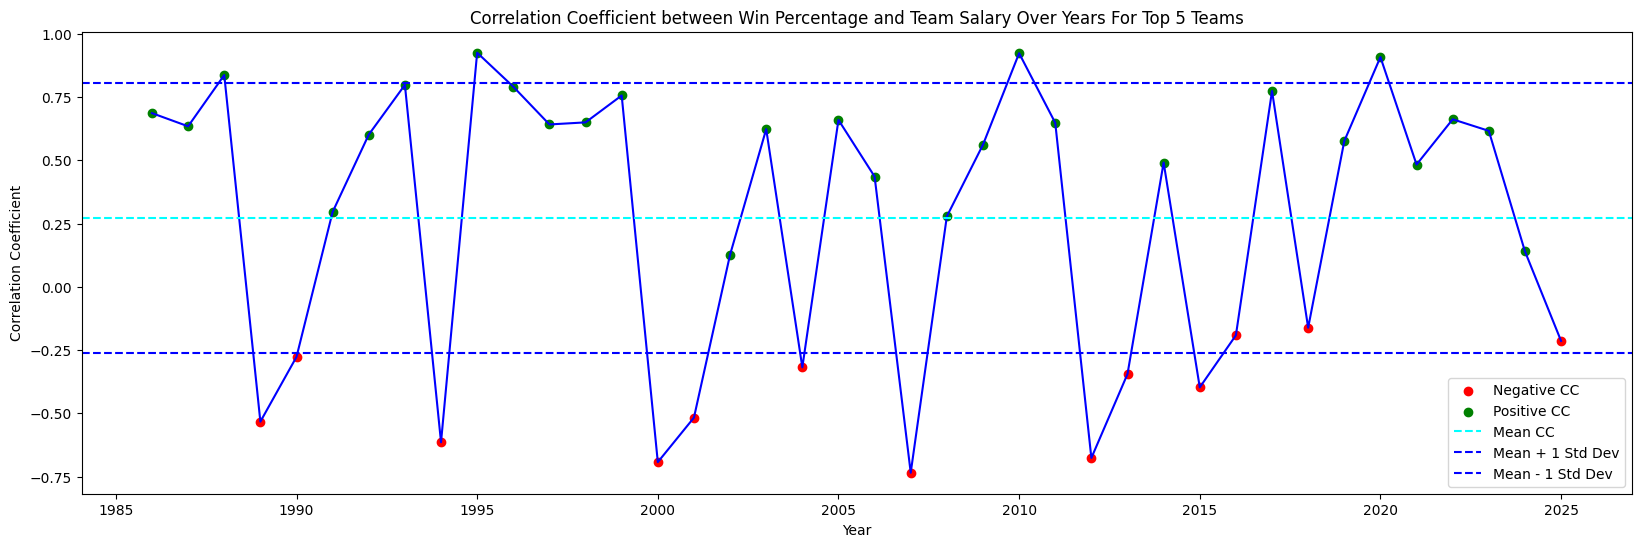

In [69]:
top_5_neg_cc_years, top_5_neg_cc_pts, top_5_pos_cc_years, top_5_pos_cc_pts = neg_cc_vs_pos_cc(corelation_of_top5_teams)

plt.figure(figsize=(20, 6))

plt.scatter(top_5_neg_cc_years, top_5_neg_cc_pts, color='red', label='Negative CC')
plt.scatter(top_5_pos_cc_years, top_5_pos_cc_pts, color='green', label='Positive CC')
plt.plot(list(corelation_of_top5_teams.keys()), list(corelation_of_top5_teams.values()), color = 'blue')

plt.axhline(y = np.mean(list(corelation_of_top5_teams.values())), color='cyan', linestyle='--', label='Mean CC')
plt.axhline(y = np.mean(list(corelation_of_top5_teams.values())) + np.std(list(corelation_of_top5_teams.values())), color='blue', linestyle='--', label='Mean + 1 Std Dev')
plt.axhline(y = np.mean(list(corelation_of_top5_teams.values())) - np.std(list(corelation_of_top5_teams.values())), color='blue', linestyle='--', label='Mean - 1 Std Dev')

plt.title('Correlation Coefficient between Win Percentage and Team Salary Over Years For Top 5 Teams')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.legend()

## 3. Compute the salary statistics of the 5 best teams and 5 worst teams for all years.

In [ ]:
top_5_salary = []
bot_5_salary = []
count= 0

for year in top_stats:
    for team in top_stats[year]:
        for i in range(len(top_stats[year])):
            count += 1
            # top_5_salary.append(team[2])
            
            
        
        
# salary_stats_top5 = dal.main_stats(top_5_salary)
# salary_stats_bot5 = dal.main_stats(bot_5_salary)

# print("Top 5 Teams Salary Stats:", salary_stats_top5)
# print("Bottom 5 Teams Salary Stats:", salary_stats_bot5)

    


ValueError: zero-size array to reduction operation maximum which has no identity